# Data preparation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, InputLayer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
def reset_graph(seed=41):
    tf.random.set_seed(seed)
    np.random.seed(seed)

In [ ]:
# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape,y_train.shape )
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
np.prod(x_train.shape[1:3])

784

In [ ]:
x_train.reshape(60000,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
x_train.reshape(60000, 784).shape

(60000, 784)

In [ ]:
# Normalize the images.
x_train = x_train / 255
x_test = x_test / 255

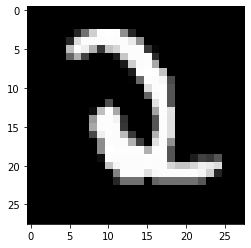

In [ ]:
plt.imshow(x_train[400],'gray')

# Design1

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, InputLayer

reset_graph()

model = Sequential([
  # layers...
  Conv2D(8, 3, input_shape=(28, 28, 1) ),
  MaxPooling2D(pool_size=2),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
reset_graph()
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
reset_graph()
history=model.fit(x_train, y_train, epochs=3,validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 46s 23ms/step - loss: 0.3402 - accuracy: 0.9050 - val_loss: 0.2175 - val_accuracy: 0.9374
Epoch 2/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1870 - accuracy: 0.9470 - val_loss: 0.1610 - val_accuracy: 0.9535
Epoch 3/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1434 - accuracy: 0.9591 - val_loss: 0.1295 - val_accuracy: 0.9616


In [ ]:
#validation
test_prob = model.predict(x_test)
# test_prob[1].round(2)
test_prob[1]

313/313 [==============================] - 2s 5ms/step


array([4.8333703e-04, 1.7936027e-04, 9.6529508e-01, 8.5798642e-03,
       1.6826766e-09, 2.0365091e-03, 1.7875323e-02, 2.1336116e-13,
       5.5506104e-03, 1.2935020e-08], dtype=float32)

In [ ]:
test_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

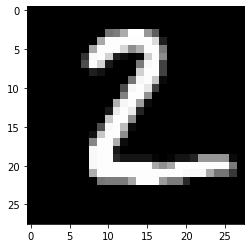

In [ ]:
plt.imshow(x_test[1],'gray')

In [ ]:
test_pred = test_prob.argmax(axis=-1)
test_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print("Classification Report of Validation data:\n\n",classification_report(y_test,test_pred))

Classification Report of Validation data:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.95      0.96      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.96      0.97      0.96       892
           6       0.97      0.97      0.97       958
           7       0.95      0.96      0.95      1028
           8       0.97      0.93      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(history.history, columns=history.history.keys())

,loss,accuracy,val_loss,val_accuracy
0,0.340208,0.905017,0.217537,0.9374
1,0.186963,0.947017,0.160963,0.9535
2,0.143363,0.959083,0.129491,0.9616


In [ ]:
def plot_loss_history(history):

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

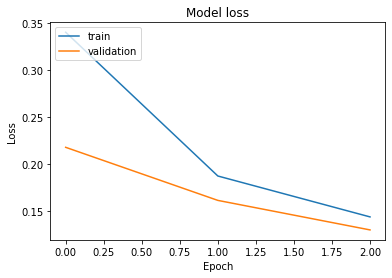

In [ ]:
plot_loss_history(history)

# tf lite conversion
[Documentation](https://www.tensorflow.org/lite/guide/inference)

In [ ]:
from keras.models import Model, load_model
from sklearn.metrics import f1_score

In [ ]:
#Saving with Keras
model.save("model.h5")

In [ ]:
loaded_model = load_model("model.h5")

In [ ]:
predictions=loaded_model.predict(x_test).argmax(-1)

313/313 [==============================] - 2s 5ms/step


In [ ]:
print('f1 score= ', f1_score( predictions, y_test, average='macro'))

f1 score=  0.9613966484880032


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model) # path to the SavedModel directory
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.target_spec.supported_types = [tf.float64] #to speed up the inference
tflite_model = converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Running a TensorFlow Lite model involves a few simple steps:

- Load the model into memory.
- Build an Interpreter based on an existing model.
- Set input tensor values. (Optionally resize input tensors if the predefined sizes are not desired.)
- Invoke inference.
- Read output tensor values.

In [ ]:
# Load TFLite model
interpreter = tf.lite.Interpreter(model_path='/content/model.tflite')
# allocate tensors.
interpreter.allocate_tensors()

In [ ]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_details

[{'name': 'serving_default_conv2d_input:0',
  'index': 0,
  'shape': array([ 1, 28, 28,  1], dtype=int32),
  'shape_signature': array([-1, 28, 28,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 10,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([-1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
test_sample=np.expand_dims(x_test[7], axis=-1)

In [ ]:
test_sample=np.expand_dims(test_sample, axis=0)

In [ ]:
test_sample.shape

(1, 28, 28, 1)

In [ ]:
test_sample=test_sample.astype('float32')

In [ ]:
test_sample.dtype

dtype('float32')

In [ ]:
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = test_sample #np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

In [ ]:
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(np.round(output_data,2))
print(output_data.argmax(-1))

[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 3.088099e+29
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
[4]


The predicted output is:4 while the true output is 9



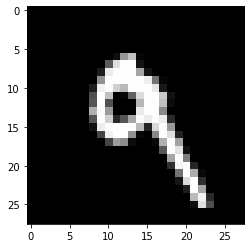

In [ ]:
print(f'The predicted output is:{ output_data.argmax(-1)[0]} while the true output is {y_test[7] }' )

print()
plt.imshow(x_test[7],'gray')
plt.show()